# 1. Business undestanding

The objectif of this exercise is about studying the data from the Stackoverflow’s 2017 annual developer survey. 
by answeing to below questions:

1. Which Countries hosts the well paid developper in this survey? 
2. Is there any luck of finding any student with good developper's salaries?
3. What are developer's job satisfaction and carreer satisfaction per Country?




## 2. Data undestanding

#### a. Accessing the DataSet
Here we are accessing data with a use of the StackOverflow data to attempt to answer our questions of interest.

In [6]:
####To get started let's read in the necessary libraries and take a look at some of our columns of interest.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
####let's read the dataset
df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
#### let's understand the Survey_result_schema 
df_fields = pd.read_csv('survey_results_schema.csv')
#df_fields.head(154)
df_fields.head(50)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


In [9]:
# this is the function for giving the dataset size
def Dataset_size(dataset):
    """
    Show the size of the dataset.
 
    INPUT:
        dataset (dataframe): The dataset to be used.
 
    OUTPUT:
        No return.
    """
    num_rows = dataset.shape[0]
    num_column = dataset.shape[1]
    print('The dataset has ' + str(num_rows) + ' rows and ' + str(num_column) + ' columns.')

In [10]:
#### call the fucntion Dataset_size() for returning the number of rows
Dataset_size(df)

The dataset has 51392 rows and 154 columns.


## B. Exploring data

Exploring the data especially by Country, as we want to focus our analyze on it

In [212]:
#### This is the function for displaying the Top 30 Professionals feedbacks per Country
def Dataset_filtering(dataset2):
    """
    Diplaying the grouping of Top 30 Professionals per Country.
 
    INPUT:
        dataset (dataframe): The dataset to be used.
 
    OUTPUT:
        No return.
    """ 
    
    stat1=dataset2.groupby(['Country']).Professional.value_counts().sort_values(axis=0, ascending=False, inplace=False)
    (stat1[:30]).plot(kind="bar");
    plt.title("Professional per Country");

    print (stat1[:30]);

Country             Professional                                        
United States       Professional developer                                  8310
India               Professional developer                                  3438
United Kingdom      Professional developer                                  3302
Germany             Professional developer                                  2767
Canada              Professional developer                                  1605
United States       Student                                                 1456
France              Professional developer                                  1246
United States       Professional non-developer who sometimes writes code    1199
India               Student                                                 1162
Poland              Professional developer                                   954
Germany             Student                                                  731
Spain               Professional dev

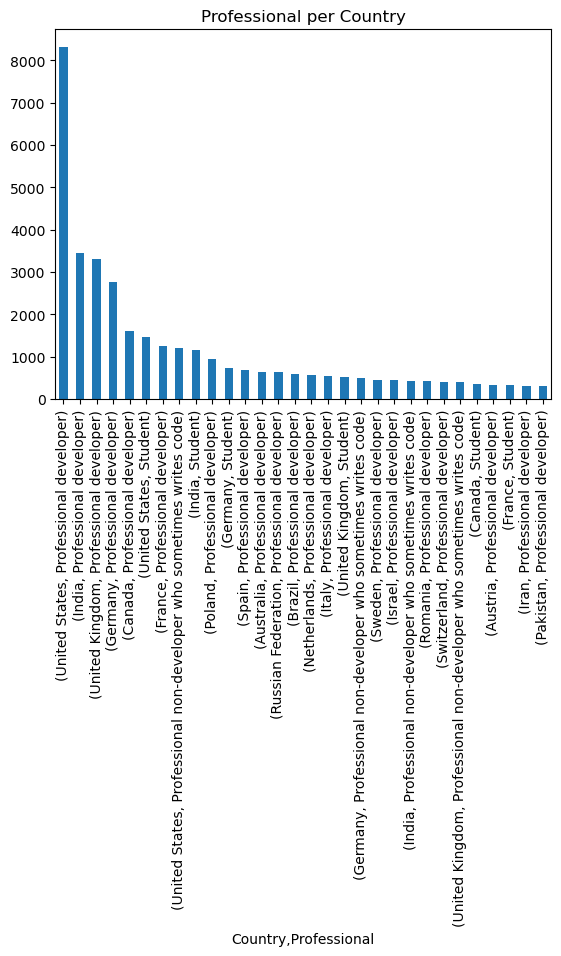

In [185]:
#### Calling the Function Dataset_filtering(), by putting our previous dataset df
#### this for displaying the Top 30 Professional feedbacks per Country
Dataset_filtering(df) 

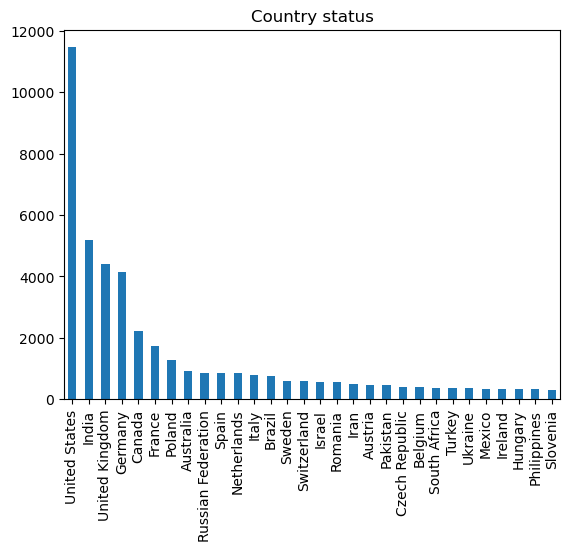

In [140]:
#### We want to see the Top 30, trend of feedback per Country itself
stat_country = df.Country.value_counts()
(stat_country[:30]).plot(kind="bar");
plt.title("Country status");

In [141]:
#### Describe the dataset
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [14]:
#### The above are variables that python is treating as numeric variables, 
### we noticed that CareerSatisfaction and JobSatisfaction have been well responded than other fields, but the salary just has few response
### however, we will try to analyse those availabe response in salary field

#### List all columns
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [144]:
#### Display the unique values for each columns, just top 30
df.nunique()[:30]

Respondent             51392
Professional               5
ProgramHobby               4
Country                  201
University                 4
EmploymentStatus           7
FormalEducation            9
MajorUndergrad            16
HomeRemote                 7
CompanySize               10
CompanyType               11
YearsProgram              21
YearsCodedJob             21
YearsCodedJobPast         21
DeveloperType           1823
WebDeveloperType           3
MobileDeveloperType       11
NonDeveloperType         134
CareerSatisfaction        11
JobSatisfaction           11
ExCoderReturn              5
ExCoderNotForMe            5
ExCoderBalance             5
ExCoder10Years             5
ExCoderBelonged            5
ExCoderSkills              5
ExCoderWillNotCode         5
ExCoderActive              5
PronounceGIF               4
ProblemSolving             5
dtype: int64

In [145]:
#### This is about displaying the unique 'Country' in the dataset
df['Country'].unique()

array(['United States', 'United Kingdom', 'Switzerland', 'New Zealand',
       'Poland', 'Colombia', 'France', 'Canada', 'Germany', 'Greece',
       'Brazil', 'Israel', 'Italy', 'Belgium', 'India', 'Chile',
       'Croatia', 'Argentina', 'Netherlands', 'Denmark', 'Ukraine',
       'Sri Lanka', 'Malaysia', 'Finland', 'Turkey', 'Spain', 'Austria',
       'Mexico', 'Russian Federation', 'Bulgaria', 'Uruguay', 'Estonia',
       'Iran', 'Bangladesh', 'Sweden', 'Lithuania', 'Paraguay', 'Romania',
       'Costa Rica', 'Serbia', 'Slovenia', 'United Arab Emirates',
       'Tunisia', 'Kenya', 'El Salvador', 'Norway', 'Dominican Republic',
       'Belarus', 'Portugal', 'Czech Republic', 'Albania',
       'I prefer not to say', 'South Africa', 'Uzbekistan', 'Moldavia',
       'Ireland', 'Nepal', 'Pakistan', 'Slovak Republic', 'Hungary',
       'Egypt', 'Australia', 'Japan', 'South Korea', 'Rwanda',
       'Luxembourg', 'Kazakhstan', 'Bolivia', 'Vietnam', 'Somalia',
       'Saudi Arabia', 'Ethiopia

In [17]:
#### This is about checking the unique values for 'Professional'
df['Professional'].unique()

array(['Student', 'Professional developer',
       'Professional non-developer who sometimes writes code',
       'Used to be a professional developer', 'None of these'],
      dtype=object)

# 3. Prepare Data (Wrangling & Cleaning)

#### a. Remove duplicates rows

In [18]:
# We are dropping duplicates as they are useless for this analysis
df.drop_duplicates()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,51388,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,...,Disagree,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree,58000.0,NaN
51388,51389,Student,No,Venezuela,"Yes, full-time",Employed full-time,Master's degree,Computer programming or Web development,Never,100 to 499 employees,...,NaN,Male,A master's degree,Black or of African descent; Hispanic or Latin...,Somewhat agree,Agree,Disagree,Agree,NaN,NaN
51389,51390,Professional developer,"Yes, I program as a hobby",Canada,No,Employed full-time,Some college/university study without earning ...,"Information technology, networking, or system ...","Less than half the time, but at least one day ...",10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51390,51391,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,Never,Fewer than 10 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Strongly agree,40000.0,NaN


In [19]:
# Checking the null value, which is identifying when the value is "True",
df.isnull()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
51388,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
51389,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
51390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [148]:
# Counting the null value values from each column
df.isnull().sum()

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64

### B. Drop rows with missing values


In [21]:
#### Removing rows with missing values.
df.dropna(how='all', axis=0, inplace=True)

In [22]:
### Calling the function Dataset_size() for displaying the size of the dataset after drop of dulplicate records
Dataset_size(df)

The dataset has 51392 rows and 154 columns.


In [ ]:
### Above result means that, no dupplicate found, neither rows with missing value,
### we noticed that the dataset size didnt change, since the first time that we ran the Dataset_size(df) function previously above

In [24]:
# Dropping missing values in the columns where we are interested in on this project
   
df_Country_Case = df.dropna(subset=['Country'], axis=0)
Dataset_size(df_Country_Case)

df_Professional_Case = df.dropna(subset=['Professional'], axis=0)
Dataset_size(df_Professional_Case)

df_Salary_Case = df.dropna(subset=['Salary'], axis=0)
Dataset_size(df_Salary_Case)

The dataset has 51392 rows and 154 columns.
The dataset has 51392 rows and 154 columns.
The dataset has 12891 rows and 154 columns.


# 4. Answer found to my questions

### A) Which countries hosts the well paid developper in this survey?

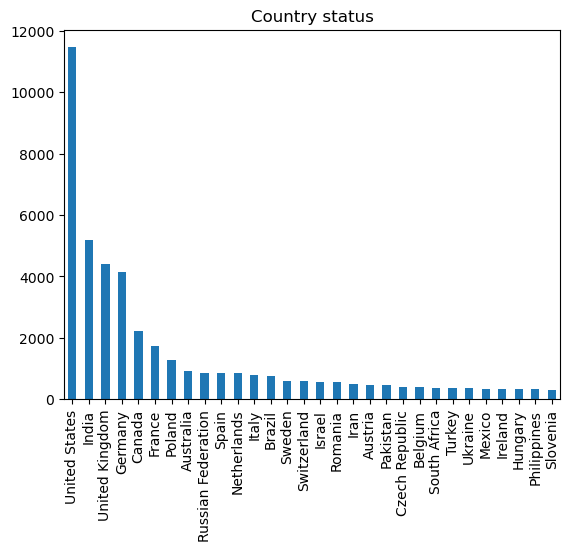

In [206]:
#### Displaying the developper per Country in a bar
stat_Country = df_Country_Case.Country.value_counts()
(stat_Country[:30]).plot(kind="bar");
plt.title("Country status");

Based on the above picture, we noticed that the United state got more developpers, next the India, next the United Kingdom, next the germany, next the Canada, next France, etc.

However, by referring to next picture below, "Virgin Islands (USA)" got the most well paid develover, next "Bermuda", next "U.S. Minor Outlying Islands", etc.

C:\Users\fntumba\AppData\Local\Temp\ipykernel_12872\1740235261.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stat_country_salary = df.groupby(['Country']).mean()['Salary'].sort_values(axis=0, ascending=False, inplace=False)


Country
Virgin Islands (USA)           175000.000000
Bermuda                        150000.000000
U.S. Minor Outlying Islands    136000.000000
Uganda                         120000.000000
Kuwait                         115200.000000
Anguilla                       100000.000000
United States                   96194.754635
Liechtenstein                   93766.666667
Switzerland                     91189.692616
Iceland                         80645.161290
Guam                            78800.000000
Bahrain                         75000.000000
Norway                          73534.353022
Puerto Rico                     72000.000000
Guinea                          70000.000000
Australia                       69215.755208
Nicaragua                       65000.000000
Israel                          62685.768457
Denmark                         62346.311631
Ireland                         61124.306735
New Zealand                     60685.513330
Cayman Islands                  57317.000000
Ca

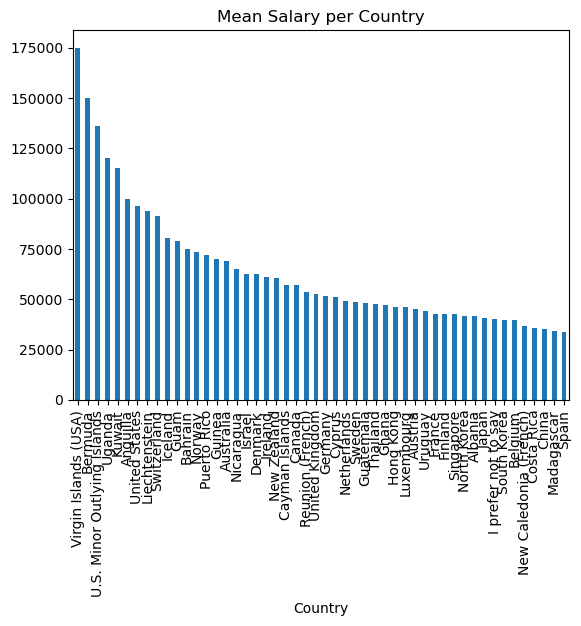

In [208]:
#### Displaying the developper's TOP 50 salary per Country
stat_country_salary = df.groupby(['Country']).mean()['Salary'].sort_values(axis=0, ascending=False, inplace=False)
(stat_country_salary[:50]).plot(kind="bar");
plt.title("Mean Salary per Country");

print(stat_country_salary [:50])

### B) Is there any luck of finding any student with good developper's salaries?


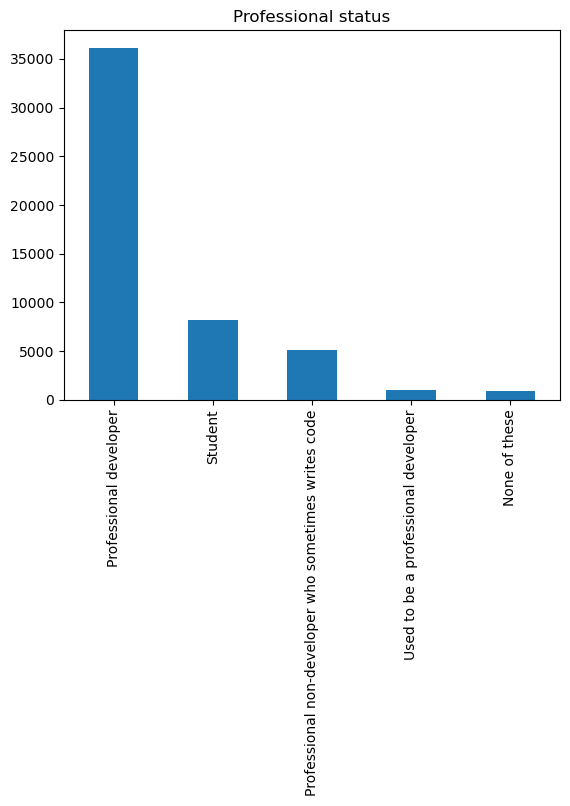

In [207]:
#### Displaying the developper per Professional in a bar
stat_Professional = df_Professional_Case.Professional.value_counts()
(stat_Professional).plot(kind="bar");
plt.title("Professional status");

based on the above figure, Students are the next responder behind Professional-developpers. by the way they don't have any salary according to below result

Professional
Professional developer                                  56298.480641
None of these                                                    NaN
Professional non-developer who sometimes writes code             NaN
Student                                                          NaN
Used to be a professional developer                              NaN
Name: Salary, dtype: float64


C:\Users\fntumba\AppData\Local\Temp\ipykernel_12872\3595417982.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Stat_Professional_salary = df.groupby(['Professional']).mean()['Salary'].sort_values(axis=0, ascending=False, inplace=False);


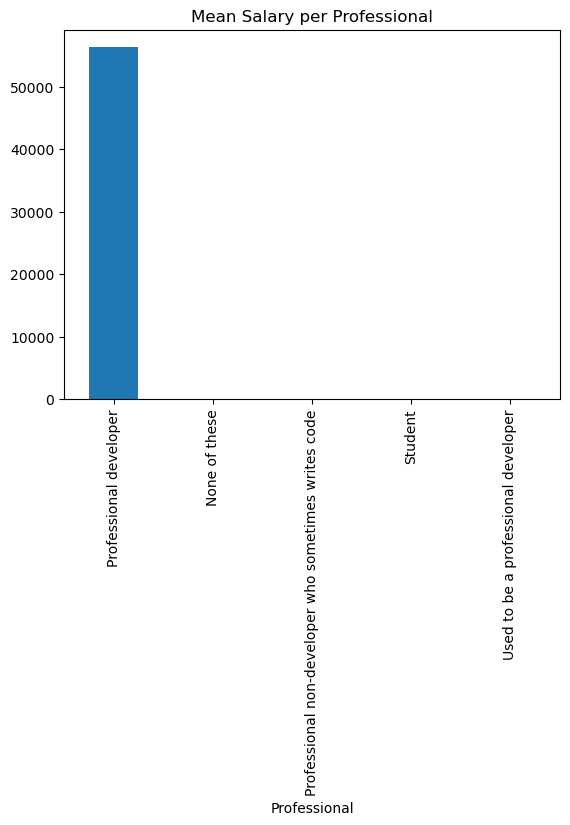

In [210]:
#### Displaying the developper Salary per Professional
Stat_Professional_salary = df.groupby(['Professional']).mean()['Salary'].sort_values(axis=0, ascending=False, inplace=False);
(Stat_Professional_salary[:30]).plot(kind="bar");
plt.title("Mean Salary per Professional");
print (Stat_Profesional_salary[:30])

Students are moreoften developping from United State, in India, in Germany, United Kingdom, etc. see below figure

Country             Professional                                        
United States       Professional developer                                  8310
India               Professional developer                                  3438
United Kingdom      Professional developer                                  3302
Germany             Professional developer                                  2767
Canada              Professional developer                                  1605
United States       Student                                                 1456
France              Professional developer                                  1246
United States       Professional non-developer who sometimes writes code    1199
India               Student                                                 1162
Poland              Professional developer                                   954
Germany             Student                                                  731
Spain               Professional dev

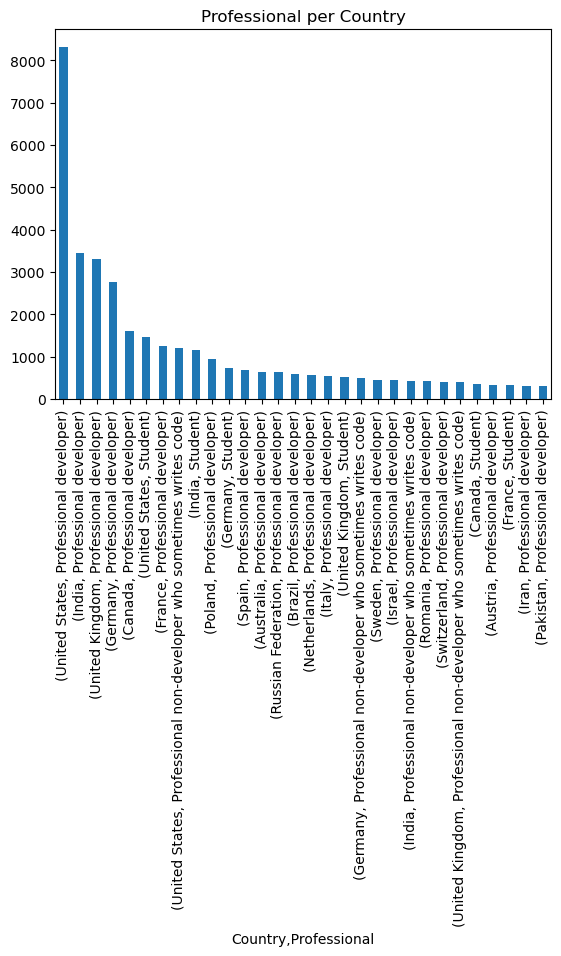

In [209]:
#### Displaying the developper Professional per Country
stat_Professional2 = df.groupby(['Country']).Professional.value_counts().sort_values(axis=0, ascending=False, inplace=False)
(stat_Professional2[:30]).plot(kind="bar");
plt.title("Professional per Country");

print (stat_Professional2[:30])

### C) What are developer's job satisfaction and carreer satisfaction per Country?

In [218]:
#### Displaying the developper's CareerSatisfaction per Professional
Stat_Professional_CareerSatisfaction = df.groupby(['Professional']).mean()['CareerSatisfaction'].sort_values(axis=0, ascending=False, inplace=False);
#(Stat_Professional_CareerSatisfaction[:30]).plot(kind="bar");
#plt.title("Mean CareerSatisfaction per Professional");
print (Stat_Professional_CareerSatisfaction[:30])

Professional
Professional developer                                  7.422040
Professional non-developer who sometimes writes code    6.757354
Used to be a professional developer                     6.701863
None of these                                           6.113850
Student                                                 5.600000
Name: CareerSatisfaction, dtype: float64


C:\Users\fntumba\AppData\Local\Temp\ipykernel_12872\2047193791.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Stat_Professional_CareerSatisfaction = df.groupby(['Professional']).mean()['CareerSatisfaction'].sort_values(axis=0, ascending=False, inplace=False);


referring to above, the highest CareerSatisfaction has been identified to the Professional developer, and most of them are setting in the United State, United Kingdom, Germany and India, etc. to see below

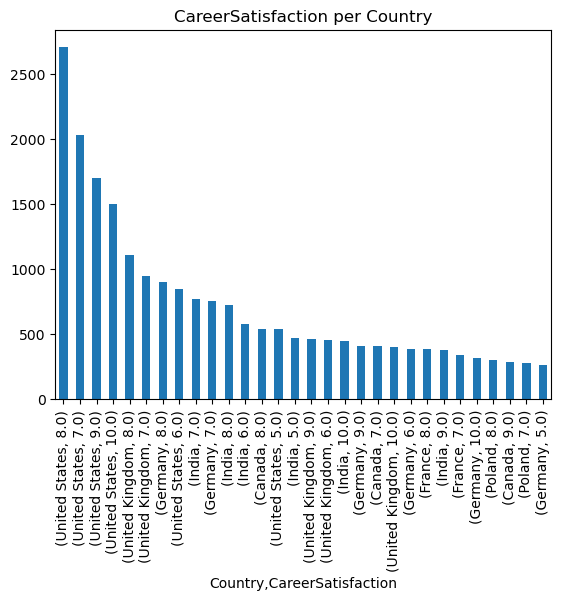

In [214]:
#### Displaying the developper's CareerSatisfaction per Country

stat_CareerSatisfaction = df.groupby(['Country']).CareerSatisfaction.value_counts().sort_values(axis=0, ascending=False, inplace=False)
(stat_CareerSatisfaction[:30]).plot(kind="bar");
plt.title("CareerSatisfaction per Country");

#print (stat_CareerSatisfaction[:30])

In [216]:
#### Displaying the developper's JobSatisfaction per Professional in a bar

Stat_Professional_JobSatisfaction = df.groupby(['Professional']).mean()['JobSatisfaction'].sort_values(axis=0, ascending=False, inplace=False);
#(Stat_Professional_JobSatisfaction[:30]).plot(kind="bar");
#plt.title("Mean JobSatisfaction per Professional");
print (Stat_Professional_JobSatisfaction[:30])

Professional
Professional developer                                  7.009612
Professional non-developer who sometimes writes code    6.621138
Used to be a professional developer                     6.604138
Student                                                 5.000000
None of these                                                NaN
Name: JobSatisfaction, dtype: float64


C:\Users\fntumba\AppData\Local\Temp\ipykernel_12872\3468686510.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Stat_Professional_JobSatisfaction = df.groupby(['Professional']).mean()['JobSatisfaction'].sort_values(axis=0, ascending=False, inplace=False);


referring to above value, and same as the (CareerSatisfaction) the highest JobSatisfaction has been identified to the Professional developer, and most of them are setting in the United State, United Kingdom, Germany and India, etc. to see below

Country         JobSatisfaction
United States   8.0                2133
                7.0                1691
                9.0                1554
                10.0               1127
                6.0                 997
United Kingdom  8.0                 872
                7.0                 790
United States   5.0                 774
Germany         8.0                 741
India           7.0                 653
Germany         7.0                 619
India           6.0                 596
                8.0                 583
                5.0                 556
United Kingdom  9.0                 530
Germany         9.0                 488
Canada          8.0                 450
United Kingdom  6.0                 426
United States   4.0                 367
Germany         6.0                 341
Canada          7.0                 340
United Kingdom  10.0                336
United States   3.0                 324
Germany         10.0                309
India   

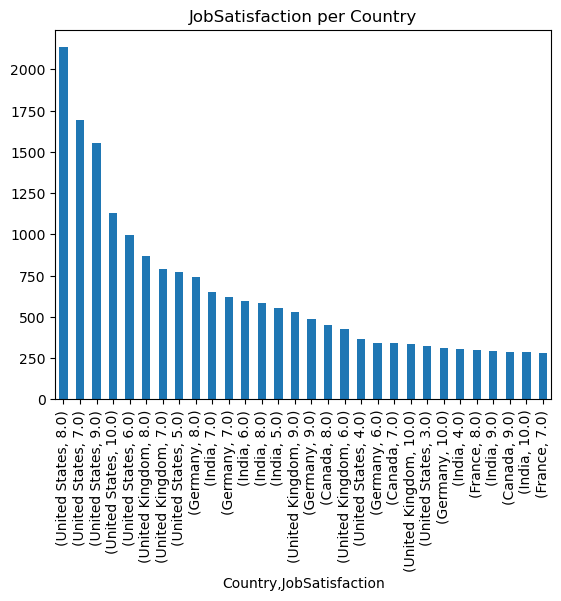

In [211]:
#### Displaying the developper's JobSatisfaction per Country

stat_JobSatisfaction = df.groupby(['Country']).JobSatisfaction.value_counts().sort_values(axis=0, ascending=False, inplace=False)
(stat_JobSatisfaction[:30]).plot(kind="bar");
plt.title("JobSatisfaction per Country");

print (stat_JobSatisfaction[:30])


C:\Users\fntumba\AppData\Local\Temp\ipykernel_12872\2532324781.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stat_JobSatisfaction = df.groupby(['Country']).mean()['JobSatisfaction'].sort_values(axis=0, ascending=False, inplace=False)


Country
Libya                             10.000000
Macau                             10.000000
Angola                             9.000000
Yemen                              9.000000
Anguilla                           9.000000
Laos                               9.000000
Andorra                            9.000000
New Caledonia (French)             8.666667
Suriname                           8.500000
Virgin Islands (USA)               8.200000
Iceland                            8.090909
Malawi                             8.000000
Tadjikistan                        8.000000
Gibraltar                          8.000000
Polynesia (French)                 8.000000
Bermuda                            8.000000
S. Georgia & S. Sandwich Isls.     8.000000
Puerto Rico                        7.937500
Qatar                              7.875000
Costa Rica                         7.804878
Ecuador                            7.739130
Nicaragua                          7.727273
Cyprus                  

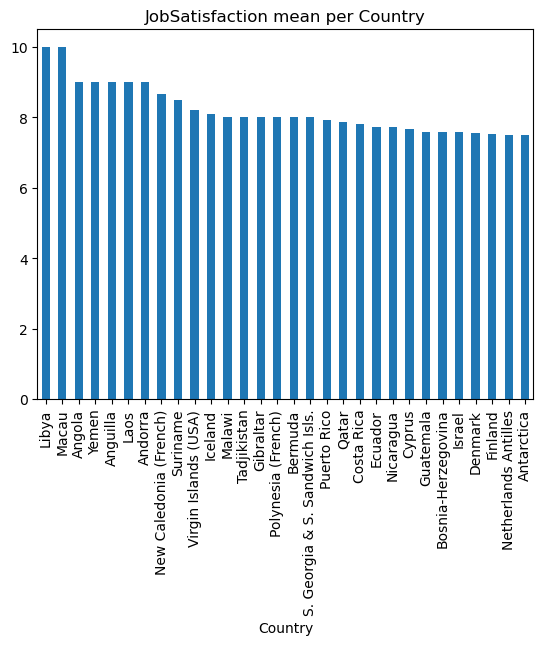

In [191]:
#### Displaying the developper's Mean JobSatisfaction per Country
stat_JobSatisfaction = df.groupby(['Country']).mean()['JobSatisfaction'].sort_values(axis=0, ascending=False, inplace=False)
(stat_JobSatisfaction[:30]).plot(kind="bar");
plt.title("JobSatisfaction mean per Country");
print (stat_JobSatisfaction[:30])
